# Reading product review data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#df_ mount = ("amazon_baby.csv")
df = pd.read_csv("/content/drive/My Drive/amazon_baby.csv")



In [0]:
#droping missing values
df = df.dropna(axis=0)


Most frequent items

In [4]:
frq = df["name"].value_counts()
print(frq)

Vulli Sophie the Giraffe Teether                                                779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                             560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision        558
Baby Einstein Take Along Tunes                                                  545
Cloud b Twilight Constellation Night Light, Turtle                              517
                                                                               ... 
Moby Wrap Original 100% Cotton Baby Carrier, Indigo                               1
Summer Infant 77510 Snuzzler - Ivory Cotton Terry                                 1
Carter\'s Boys 4-piece Cotton Knit Pajama Sets - Rescue Vehicles (12 Months)      1
Tot Bots Easy Fit One-Piece Diaper 8-35 lbs (Three Little Piggies)                1
Paciplay Taffy Teethable Pacifier Holder, Blue                                    1
Name: name, Length: 32315, dtype: int64


Exploring Vullie Sophie(item)

In [5]:
giraffe_review = df[df["name"]=="Vulli Sophie the Giraffe Teether"]
len(giraffe_review)# 785 people reviewd the giraffe product


779

Exploring Vullie Sophie(item) Rating


In [6]:
print(giraffe_review["rating"].value_counts())

5    531
4     93
3     62
1     56
2     37
Name: rating, dtype: int64


Exploring all users ratings

In [7]:
rating = df["rating"].value_counts().unique()
print(rating)


[106265  33053  16705  15100  11261]


Creating a plot for all reviews

Text(0.5, 0, 'Ratings')

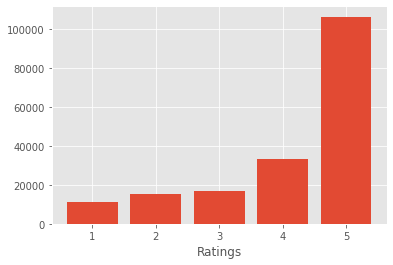

In [8]:
#Creating a plot for all reviews
from matplotlib import pyplot  as plt
plt.style.use('ggplot')
df = df.sort_values(["rating"])
rat_unique = df["rating"].unique()
rat_unique = rat_unique[::-1]
height = rating
plt.bar(rat_unique,height)
plt.xlabel("Ratings")



Defining Positive/Negative Ratings





In [9]:
df["sentiment"] = df["rating"]>=4 #It primts 1 if the rating is greater than or equal to 4 and prints 0 othervise.
df["sentiment"] = df["sentiment"].astype(int)
y = df["sentiment"]

df

,name,review,rating,sentiment
29756,Mommy\'s Helper Toilet Seat Lid-Lok,Don\'t waste your money. My ten month old had ...,1,0
174895,Summer Infant Baby Touch Boost Digital Color V...,My son is 9 months old and we are currently wa...,1,0
174897,KidCo Peapod - Cranberry,This product was recalled and redesigned due t...,1,0
70872,Skip Hop Swipe Baby Wipes Case,"The wipes case doesn\'t shut properly, so the ...",1,0
156309,RayShade&reg; UV Protective Stroller Shade Imp...,The concept is great however this shade extens...,1,0
...,...,...,...,...
78819,"Tike Tech Double City X3 Swivel Stroller, Paci...",We bought this twin stroller for our grandchil...,5,1
78813,"Tike Tech Double City X3 Swivel Stroller, Paci...",I was reluctant to buy this based on some of t...,5,1
78809,eebee\'s adventures Hand Puppet Plush Toy,"Eebee was Christmas gift for my one-year-old, ...",5,1
78801,eebee\'s adventures If The Shape Fits Stacking...,My daughter is a big Eebee fan and i was looki...,5,1


Ploting the sentiment in pie chart

1    139318
0     43066
Name: sentiment, dtype: int64


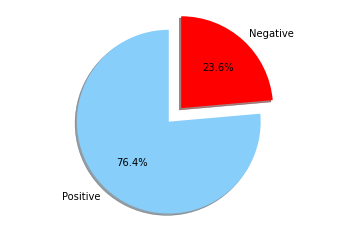

In [10]:
from matplotlib import pyplot as plt

count_Class = pd.value_counts(df["sentiment"], sort = True)
print(count_Class)
# Data to Plot
labels = 'Positive', 'Negative'
sizes = [count_Class[1], count_Class[0]]
colors =  ['lightskyblue', 'red', ]
explode = (0.1,0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
a = df['review'].astype("str")
cv = CountVectorizer(stop_words='english',min_df=3)
cv = cv.fit_transform(a)



Using Cross Validation to find the algorithm that gives the best performance

In [0]:
import xgboost as xgb
from sklearn.ensemble import forest 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statistics as stats

xg = xgb.XGBClassifier()
fo =  forest.RandomForestClassifier()
tr = tree.DecisionTreeClassifier()
lo = linear_model.LogisticRegression()

xgb_score = cross_val_score(xg,cv,y)
ran_score = cross_val_score(fo,cv,y)
dtree_score = cross_val_score(tr,cv,y)
log_score = cross_val_score(lo,cv,y)

df_score = pd.DataFrame({"model":["xgboost","RandomForestClassifier","DecisionTreeClassifier","LogisticRegression"],"score":[stats.mean(xgb_score),stats.mean(ran_score),stats.mean(dtree_score),stats.mean(log_score)]})
print(df_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#Spltting the dataframe into training and testing sample of 80% and 20% respectively.
x_train,x_test,y_train,y_test = train_test_split(cv,y,test_size=0.20,random_state=0)

# Hyperparameter Tuning Using Using BayesSearchCV
Finding the hyperparameter values of a learning algorithm that produces the best result


In [0]:

# #!pip install scikit-optimize
# import numpy as np
# from skopt import BayesSearchCV
# from sklearn import linear_model
# from sklearn.model_selection import GridSearchCV
# model = linear_model.LogisticRegression()
# param =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C': [1.0,10],'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,5000] }
# Bayes_search = BayesSearchCV(model,param,scoring="accuracy")
# Bayes_search = Bayes_search.fit(x_train,y_train)
# print(Bayes_search.best_params_)



In [0]:
#training the model
from sklearn import linear_model
model = linear_model.LogisticRegression(multi_class="ovr",C=1.0)
model = model.fit(x_train,y_train)
pred = model.predict(x_test)
score = roc_auc_score(y_test,pred)
#testing the model
#user_review = ["Type your review here"]
#user_sen = cv.transform(user_review)
#pred = model.predict(user_sen)
score_df = pd.DataFrame({"sentiment":y_test,"predicted_sentiment":pred})
print(score_df)
#score #0.8009174323031545